In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import matplotlib.pyplot as plt
import numpy as np
import cv2
import PIL
import io
import html
import time

In [ ]:
def js_to_image(js_reply):
  image_bytes = b64decode(js_reply.split(',')[1])
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  img = cv2.imdecode(jpg_as_np, flags=1)
  return img

def bbox_to_bytes(bbox_array):
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  bbox_PIL.save(iobuf, format='png')
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))
  return bbox_bytes

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  data = eval_js('takePhoto({})'.format(quality))
  img = js_to_image(data)
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print("Image Size: {}".format(gray.shape))
  faces = face_cascade.detectMultiScale(gray)
  for (x,y,w,h) in faces:
      x, y, w, h = (x,y,w,h)
    
  cv2.imwrite(filename, img)
  return filename,x,y,w,h

<IPython.core.display.Javascript object>

Image Size: (480, 640)
Saved as smile.jpg
Original Image:


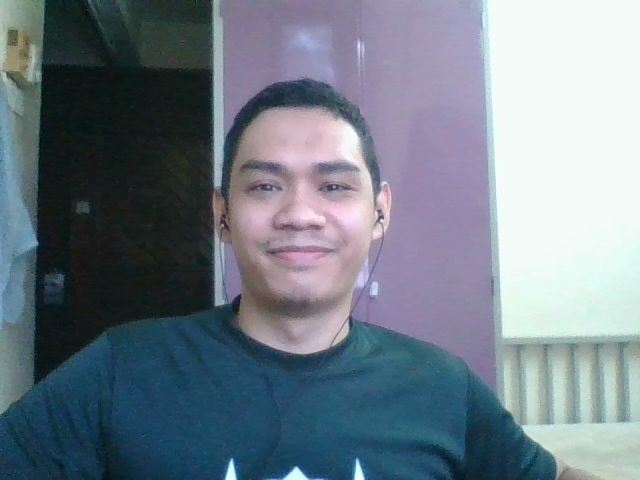

In [ ]:
try:
  filename = take_photo('smile.jpg')
  x = filename[1]
  y = filename[2]
  w = filename[3]
  h = filename[4]
  print('Saved as {}'.format(filename[0]))
  print("Original Image:")
  display(Image(filename[0]))

except Exception as err:
  print(str(err))

Target Part:
Start Point: (112,299)
End Point: (207,394)


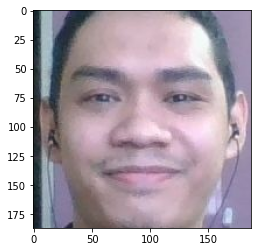

In [ ]:
print("Target Part:\nStart Point: ({},{})\nEnd Point: ({},{})".format(y,y+h,x,x+w))
kernel = np.ones((3,3), np.float32)/9
image_BGR = cv2.imread("smile.jpg")[y:y+h, x:x+w]
image_RGB = cv2.cvtColor(image_BGR, cv2.COLOR_BGR2RGB)
image_Gray = cv2.cvtColor(image_RGB,cv2.COLOR_RGB2GRAY)
convolvedImg = cv2.filter2D(image_Gray, -1,kernel)
plt.imshow(image_RGB)
plt.show()

In [ ]:
def displayImage(image):
    if len(image.shape)==3:
        color_coverted = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(color_coverted)
        plt.show()        
    else:
        plt.imshow(image, cmap="gray")
        plt.show()

Canny Edge Detection:


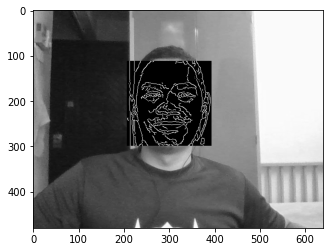

True

In [ ]:
imgCanny = cv2.Canny(convolvedImg,20,70)
original = cv2.imread("smile.jpg")
original = cv2.cvtColor(original, cv2.COLOR_RGB2GRAY)
original[y:y+h, x:x+w] = imgCanny
print("Canny Edge Detection:")
displayImage(original)
cv2.imwrite("Smile_Canny.jpg", original)

Sobel Edge Detection:


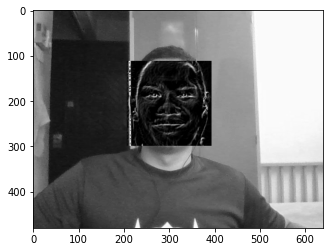

True

In [ ]:
sobelx = cv2.Sobel(convolvedImg, cv2.CV_8U,1,0,ksize=3)
sobely = cv2.Sobel(convolvedImg, cv2.CV_8U,0,1,ksize=3)
imgSobel = sobelx + sobely
original[y:y+h, x:x+w] = imgSobel
print("Sobel Edge Detection:")
displayImage(original)
cv2.imwrite("Smile_Sobel.jpg", original)

Gaussian Blurred Image:


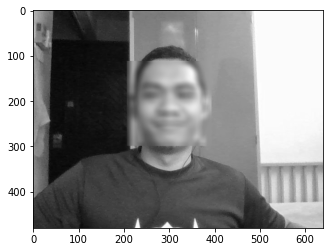

True

In [ ]:
target = cv2.imread("smile.jpg")[y:y+h, x:x+w]
target = cv2.cvtColor(target, cv2.COLOR_RGB2GRAY)
imgBlur = cv2.GaussianBlur(target,(15,15),10)
original[y:y+h, x:x+w] = imgBlur
print("Gaussian Blurred Image:")
displayImage(original)
cv2.imwrite("Smile_Blur.jpg", original)

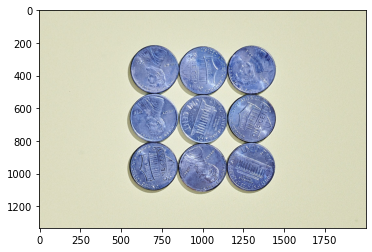

In [150]:
path = "/content/drive/MyDrive/Colab Notebooks/"
image=cv2.imread(path+'coins.jpg')
plt.imshow(image)


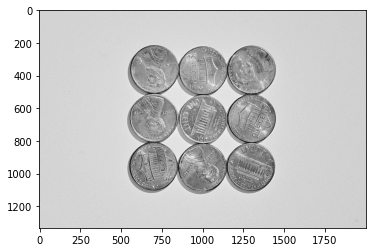

In [151]:
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap= 'gray');


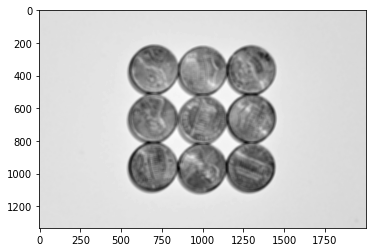

In [165]:
blur= cv2.GaussianBlur(gray, (19,19), 50)
plt.imshow(blur,cmap='gray')


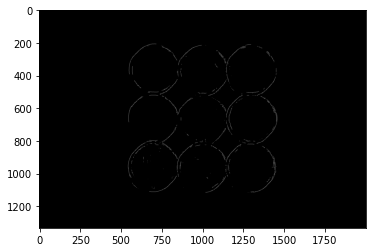

In [171]:
canny=cv2.Canny(blur,60,60,1)
plt.imshow(canny,cmap='gray')


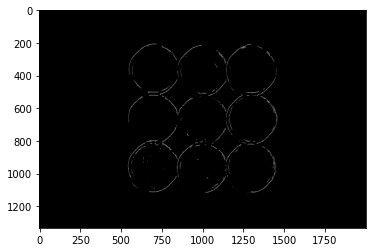

In [172]:
dilated= cv2.dilate(canny, (5,5),iterations=1)
plt.imshow(dilated,cmap='gray')


Coin in the image is:  687


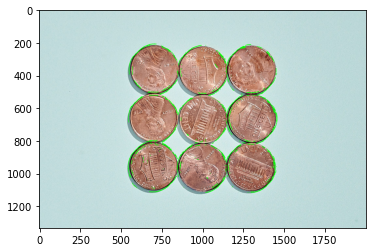

In [173]:
(cnt,heirarchy)=cv2.findContours(dilated.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb,cnt,-1,(0,255,0),2)
plt.imshow(rgb)
print('Coin in the image is: ' , len(cnt))